In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 18.1 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xd9ncJGa97MVycPyV1aW")
project = rf.workspace("jon-betolaza").project("basketball-players-c8zbl")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to basketball-players-2 in yolov11:: 100%|██████████| 312/312 [00:00<00:00, 3009.86it/s]


In [7]:
!yolo task=detect mode=train data=/content/basketball-players-2/data.yaml model="yolo11n.pt" epochs=50 imgsz=640


100% 5.35M/5.35M [00:00<00:00, 91.8MB/s]
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/basketball-players-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

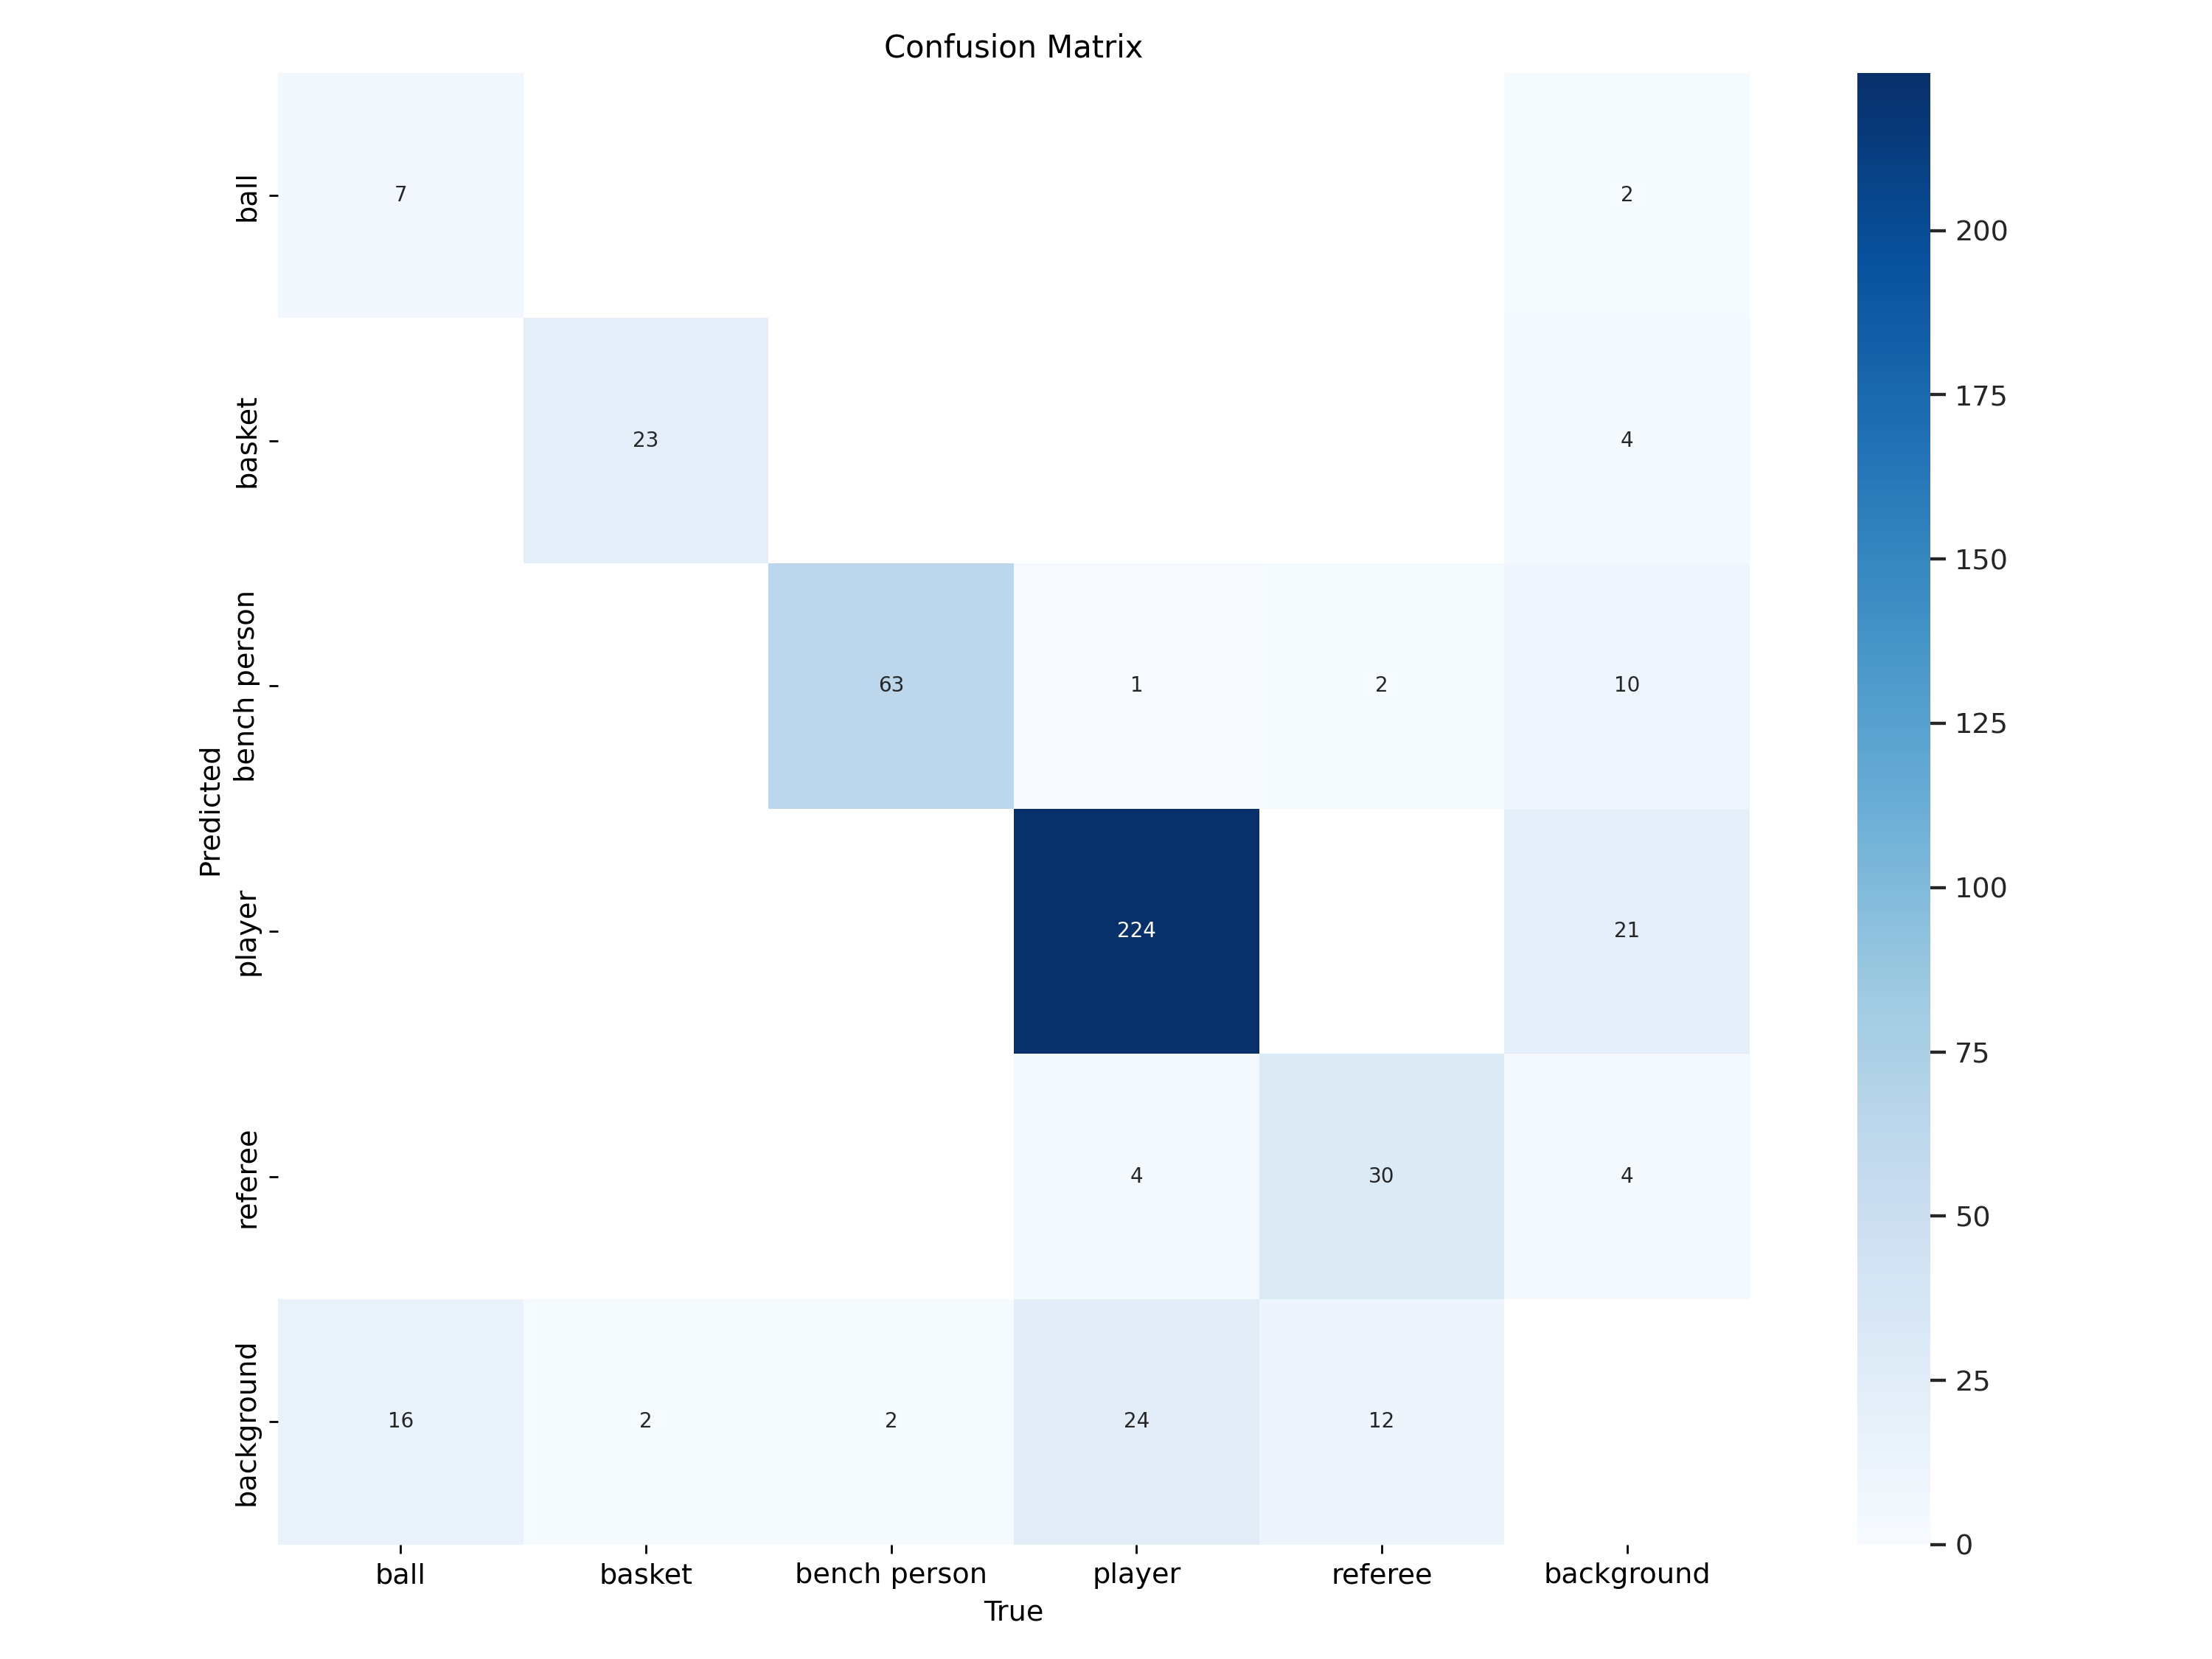

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)


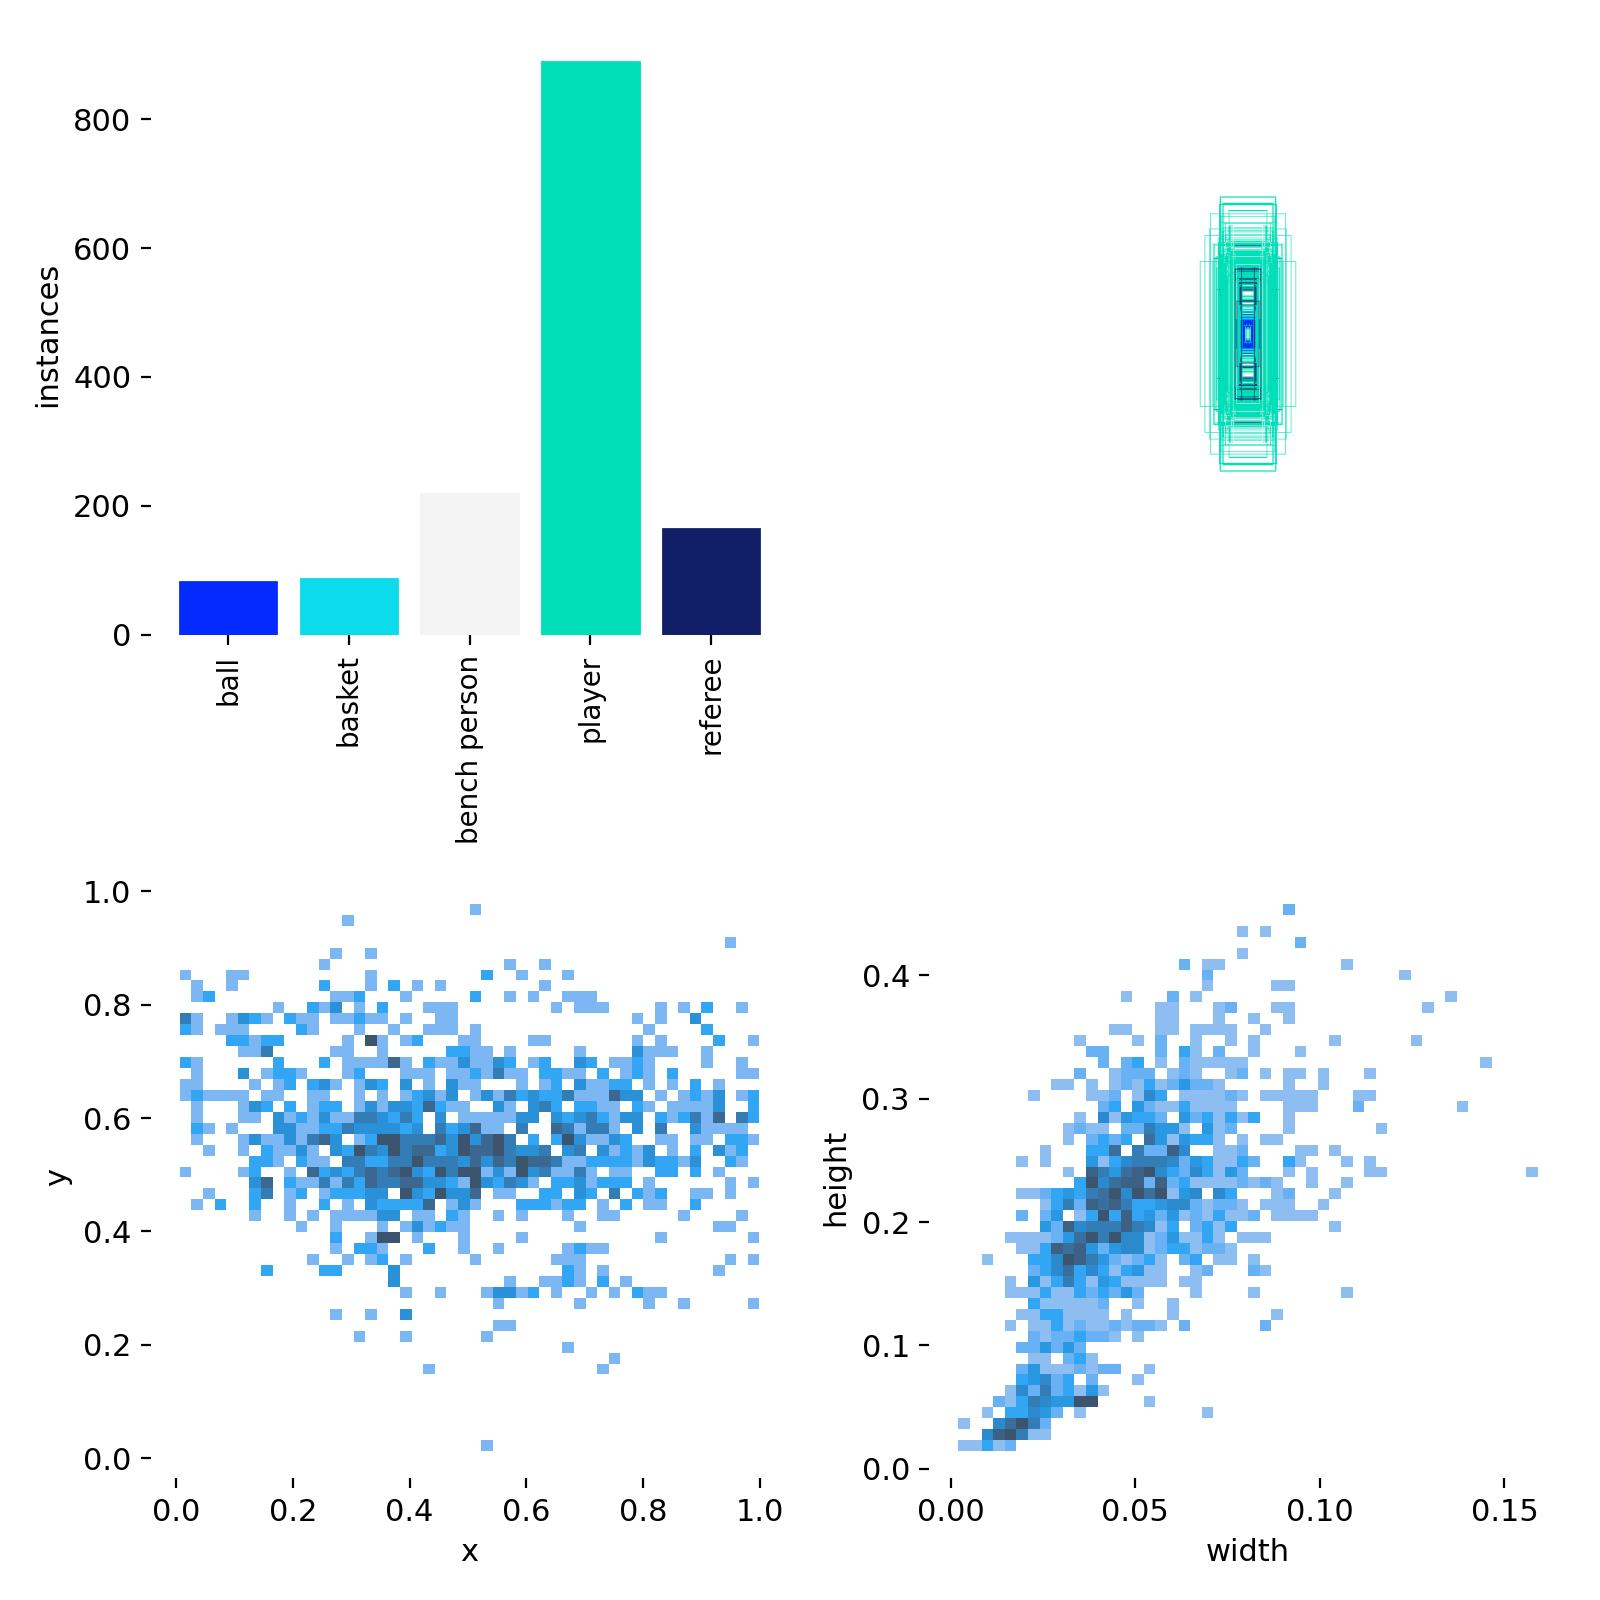

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)


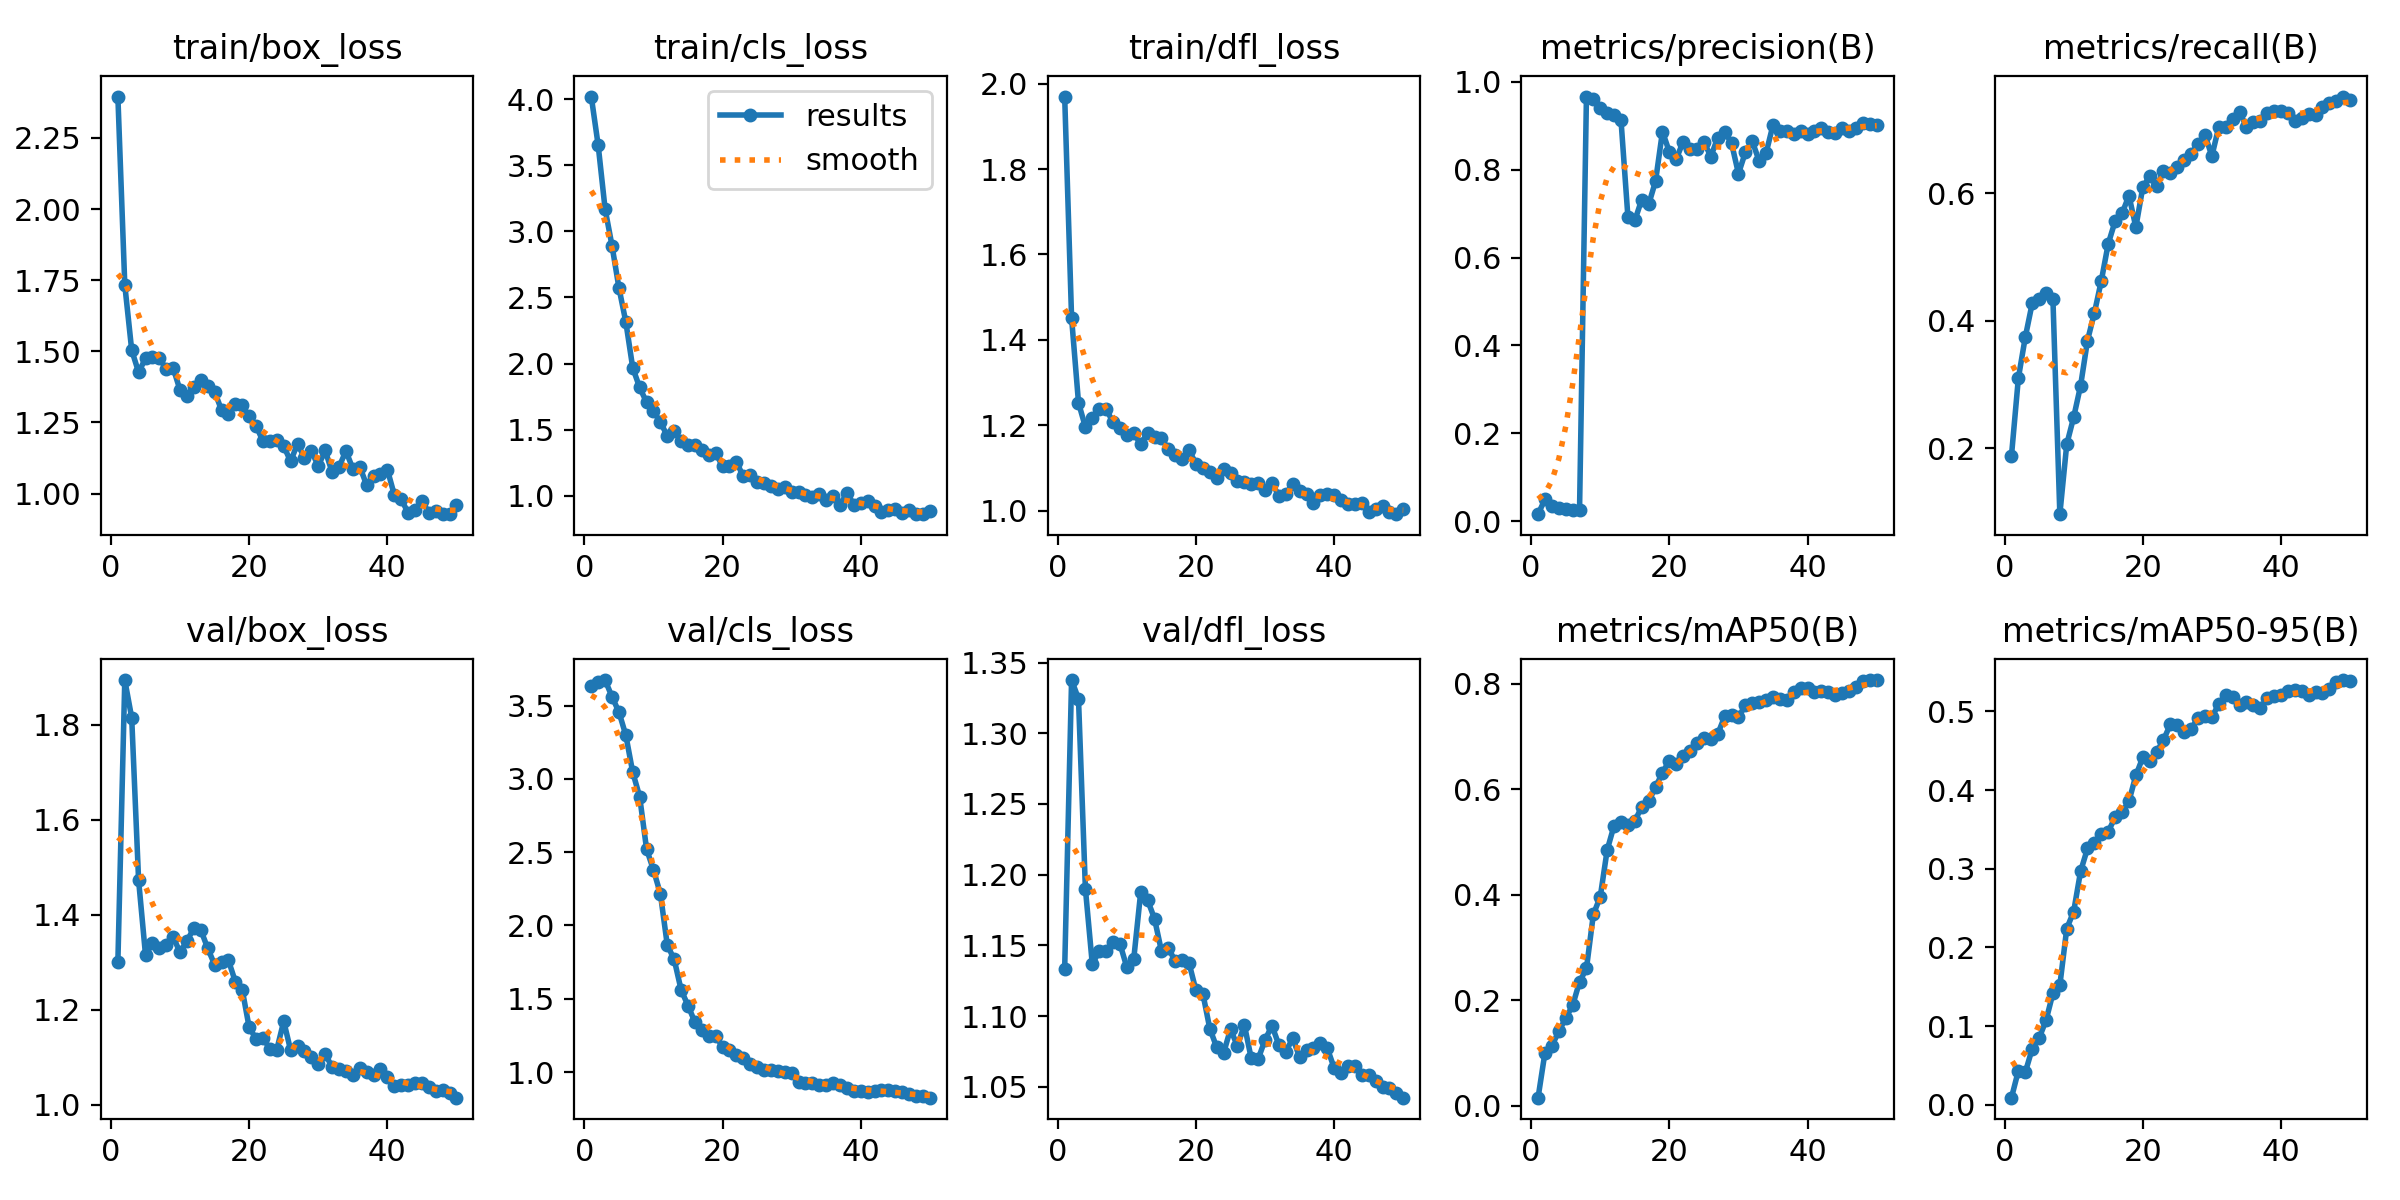

In [10]:
Image("/content/runs/detect/train/results.png", width=600)


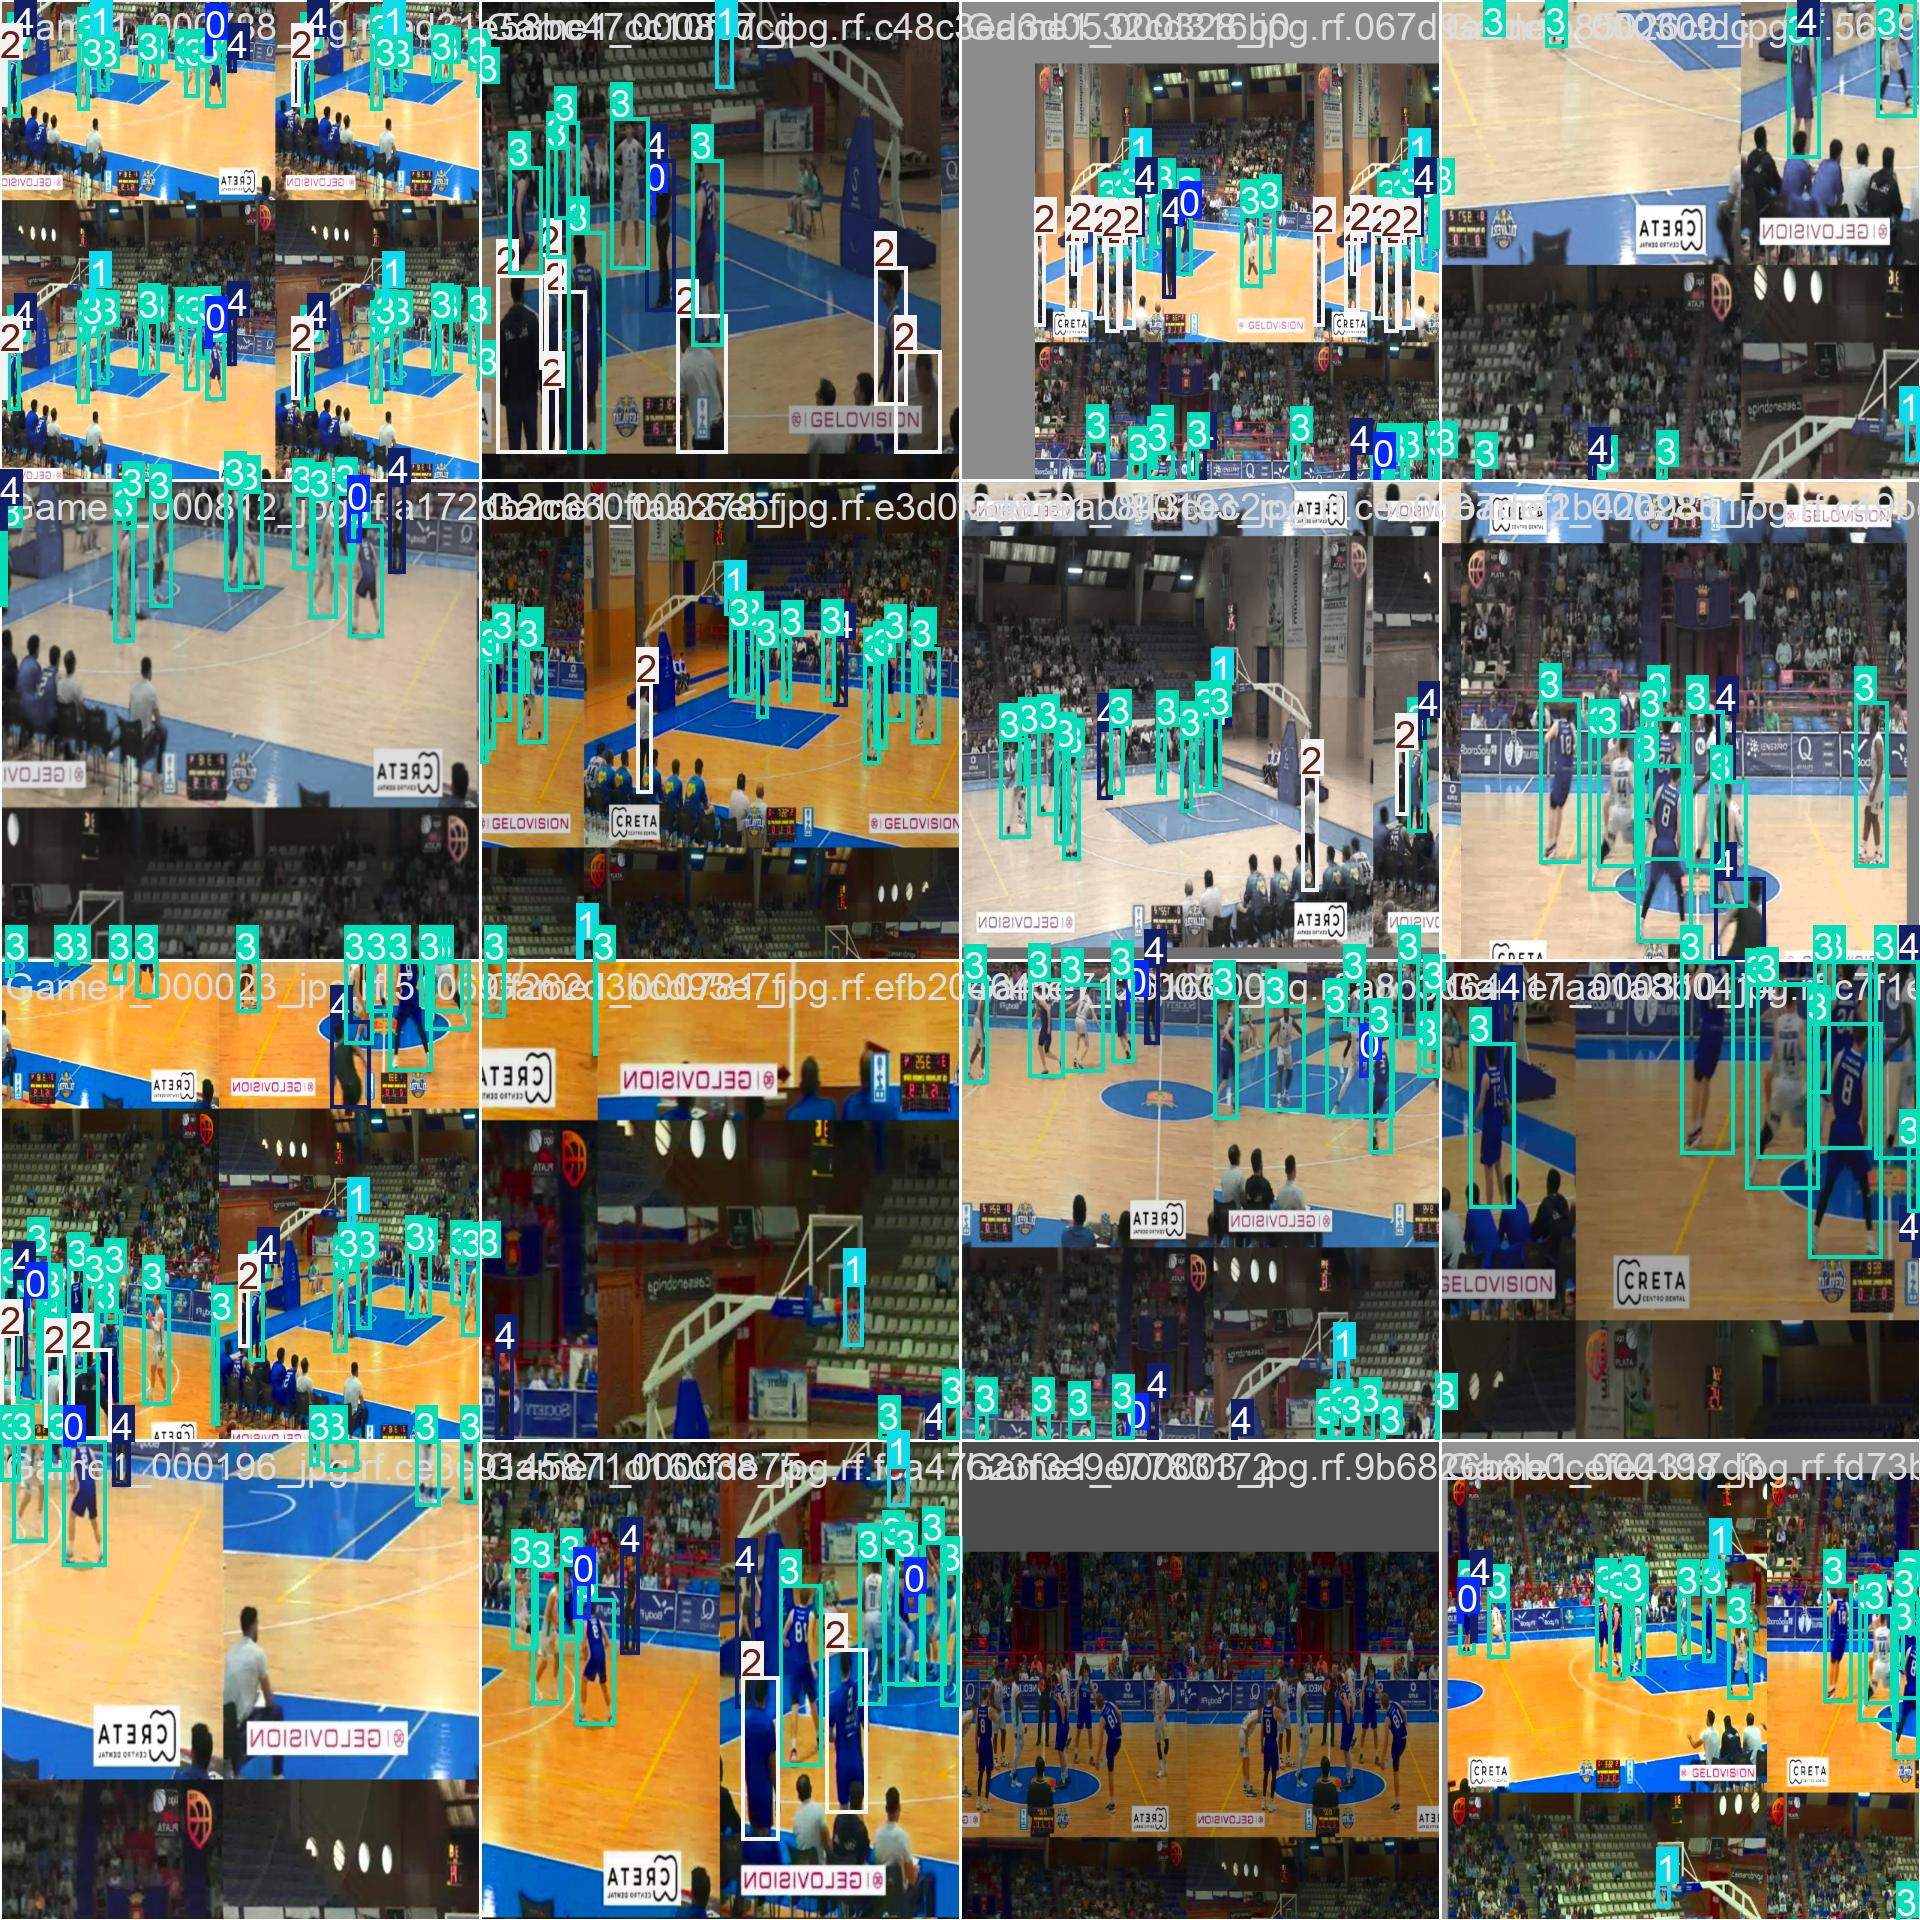

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)


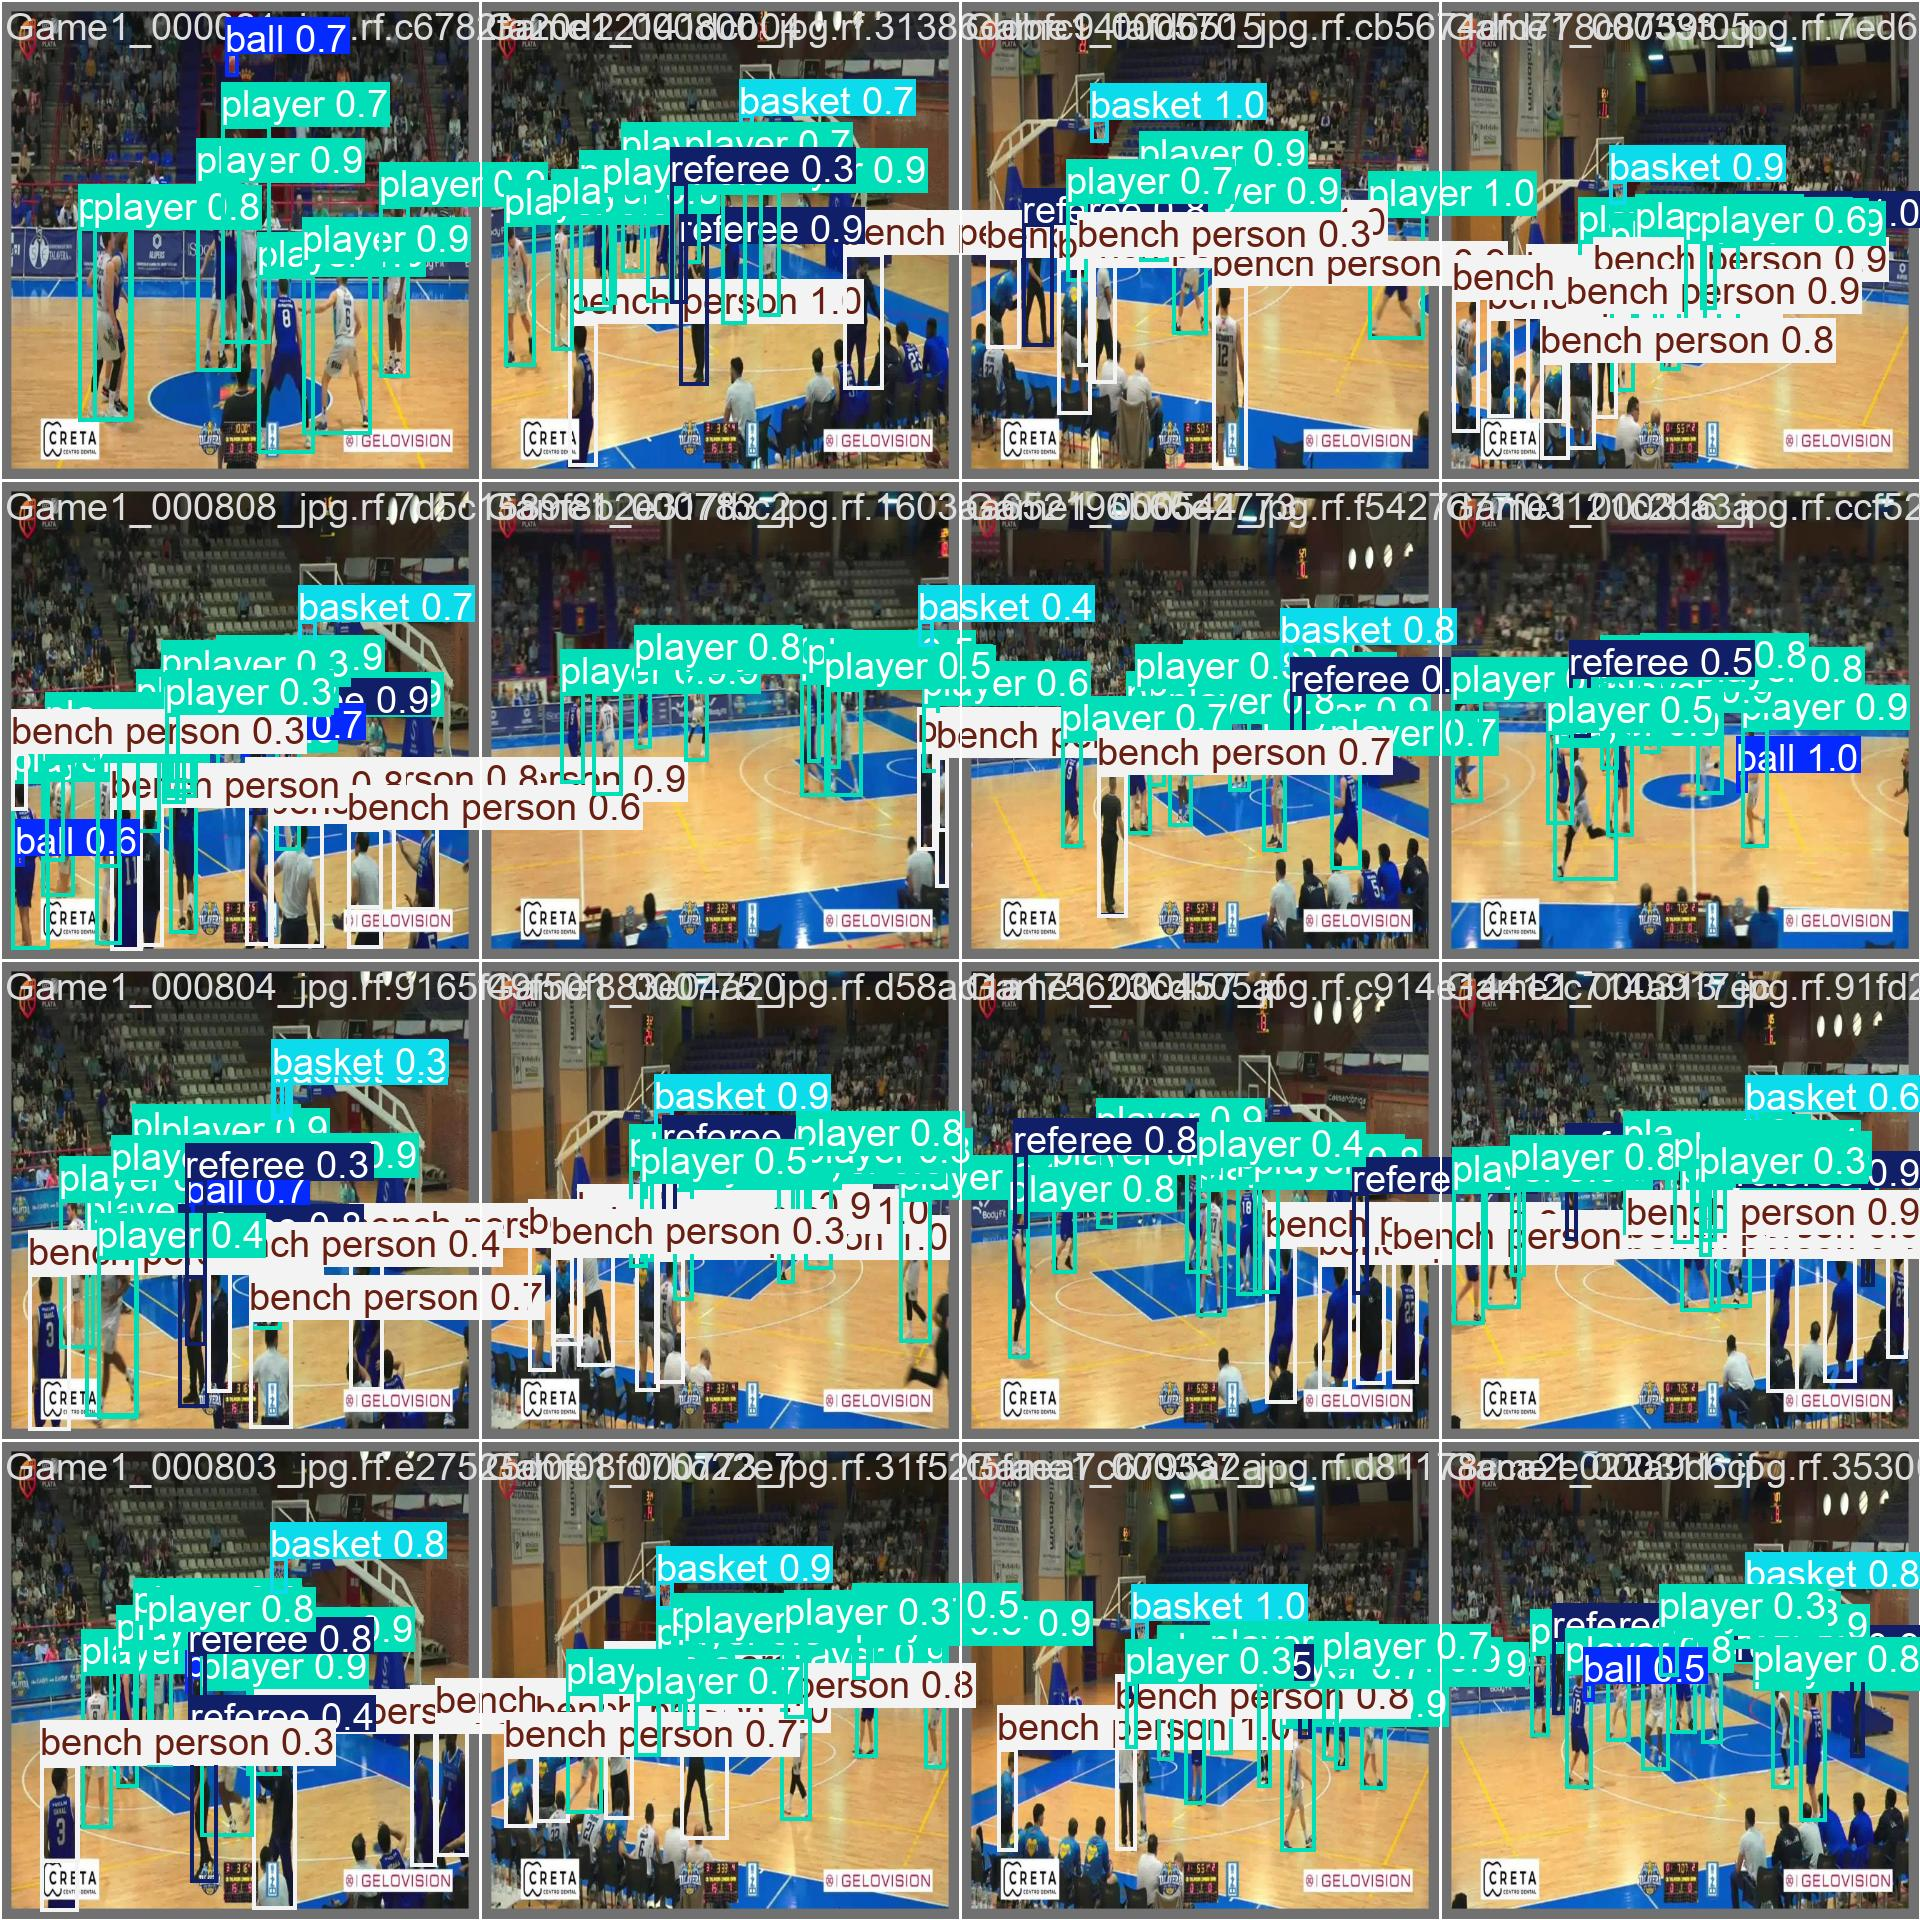

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)


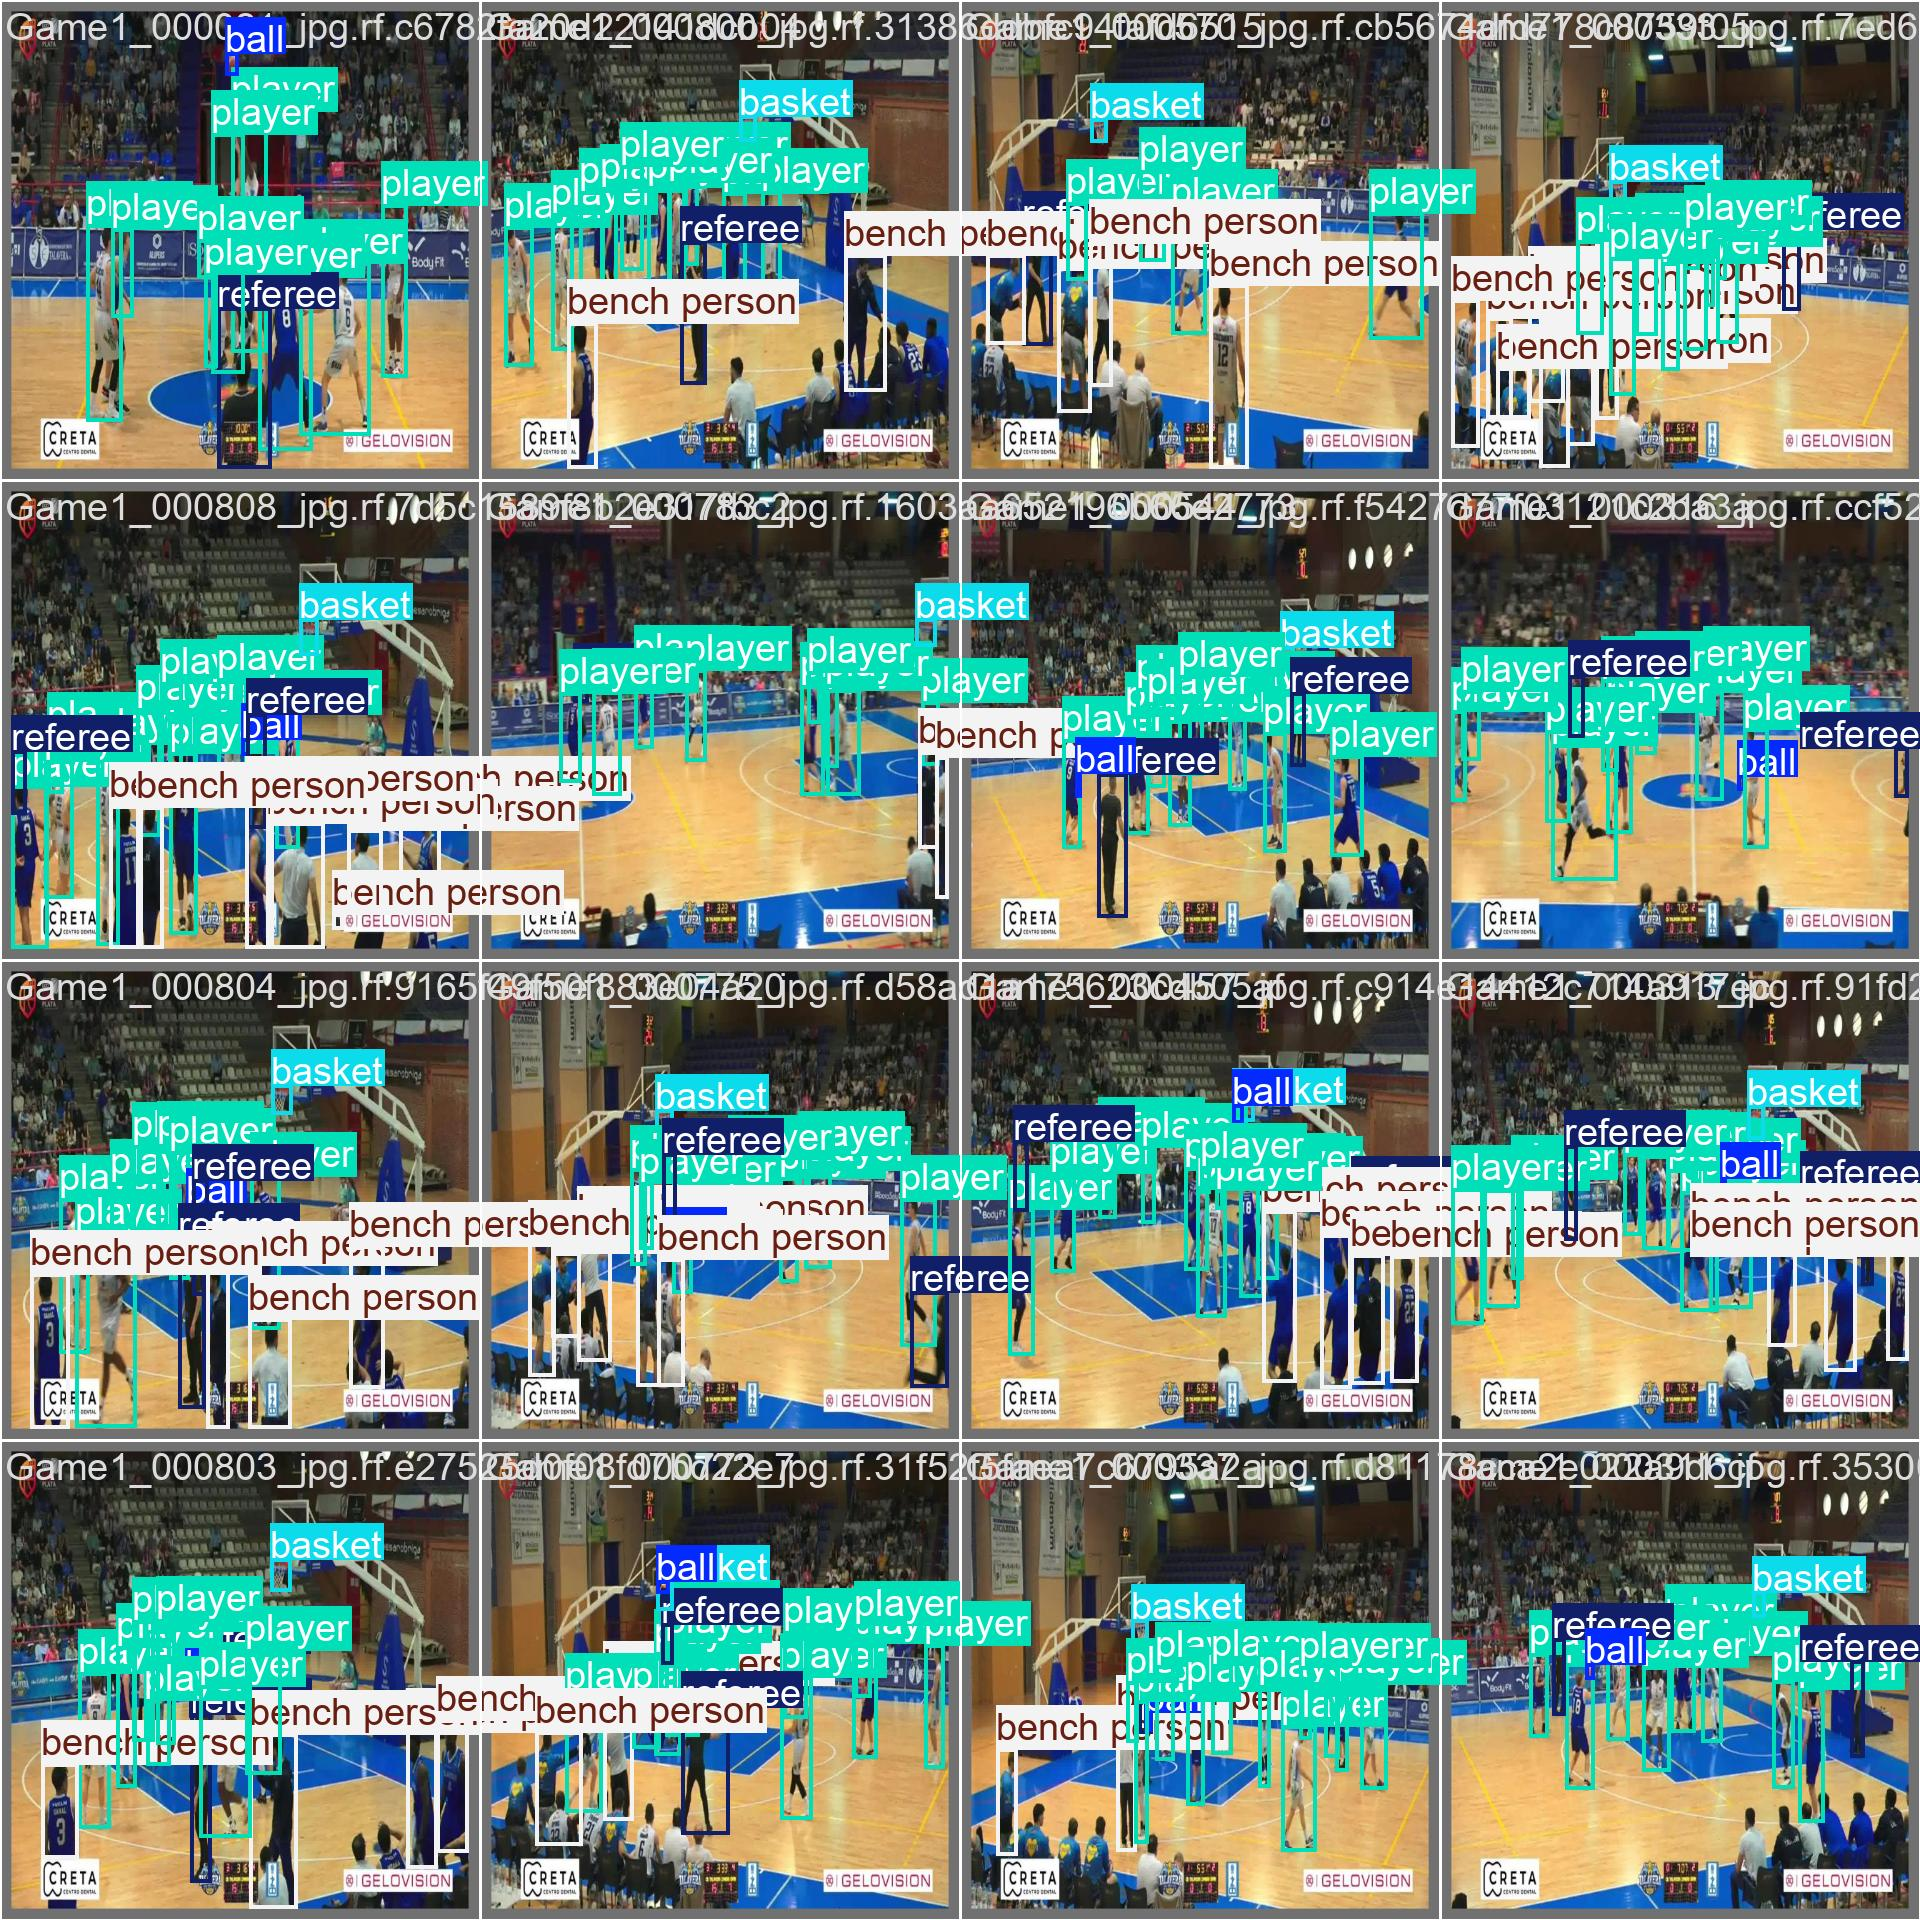

In [15]:
Image("/content/runs/detect/train/val_batch0_labels.jpg", width=1000)


In [16]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data=/content/basketball-players-2/data.yaml


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/basketball-players-2/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100% 28/28 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.18s/it]
                   all         28        410      0.905      0.752      0.807      0.538
                  ball         23         23      0.749      0.304      0.401      0.202
                basket         25         25          1      0.915      0.974      0.638
          bench person         20         65      0.907      0.969      0.962      0.682
                player         28        253      0.956      0.867      0.924      0.653
               referee         28         44      0.911      0.705      0.777      0.515
Speed: 0.2ms preprocess, 14.0ms inference, 0.0

In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=/content/basketball-players-2/test/images save=True


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/21 /content/basketball-players-2/test/images/Game1_000022_jpg.rf.4e5edadc52940ffcb3d1be04a9f9c2b1.jpg: 640x640 2 balls, 8 players, 2 referees, 11.4ms
image 2/21 /content/basketball-players-2/test/images/Game1_000025_jpg.rf.148a832efdb1e5d557431bd012053531.jpg: 640x640 8 players, 2 referees, 9.0ms
image 3/21 /content/basketball-players-2/test/images/Game1_000027_jpg.rf.1e42e731e89b01b6056a355e2c05ebae.jpg: 640x640 1 ball, 1 bench person, 8 players, 1 referee, 8.3ms
image 4/21 /content/basketball-players-2/test/images/Game1_000192_jpg.rf.17715bff7423f23fd6be8a64eaef862f.jpg: 640x640 1 ball, 1 basket, 1 bench person, 5 players, 8.1ms
image 5/21 /content/basketball-players-2/test/images/Game1_000201_jpg.rf.aeefc5807149f7864f98cca18377cbf7.jpg: 640x640 1 ball, 1 basket, 1 bench person, 9 players, 9.2ms
image 6/21 /conte

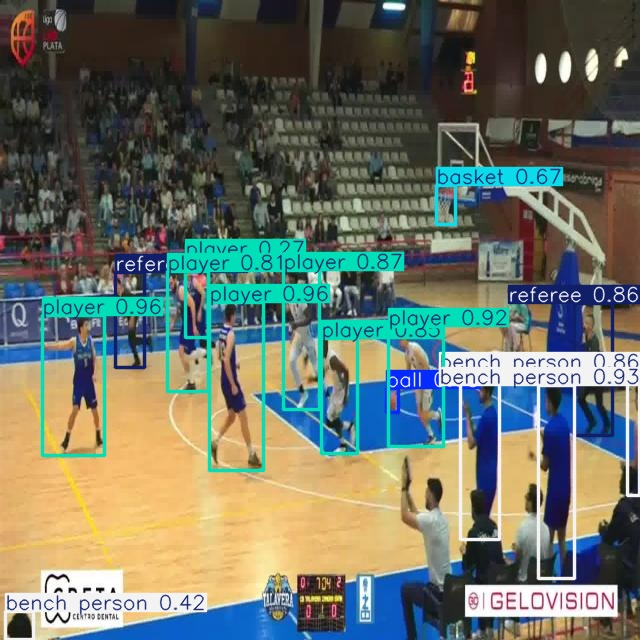

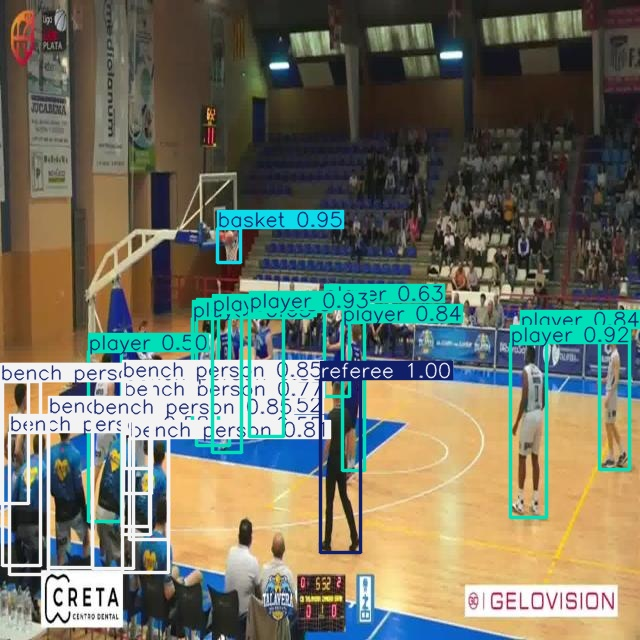

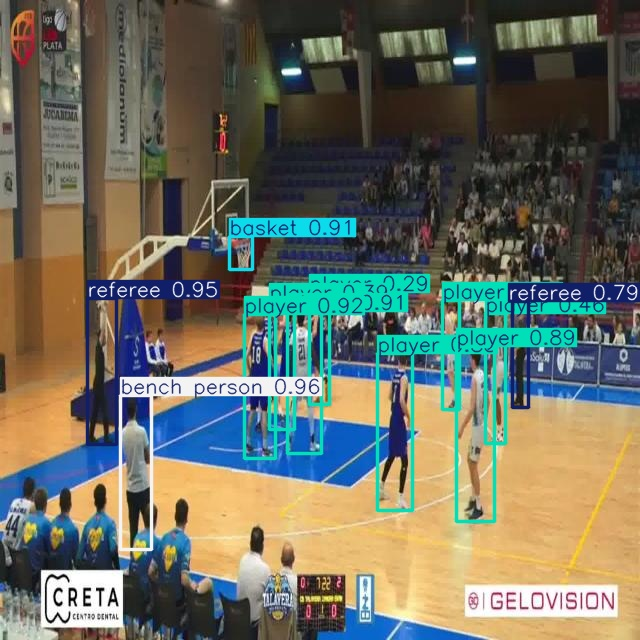

In [19]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=1000))
    print("\n")


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
%cd /content

/content


In [34]:
!zip -r content.zip /content

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/object_detection_yolo11/content/drive/.Encrypted/MyDrive/objec

In [35]:
from google.colab import files
files.download('content.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>